<ipython-input-2-cc13bcf732a2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sweden_data['date'] = pd.to_datetime(uk_sweden_data['date'])


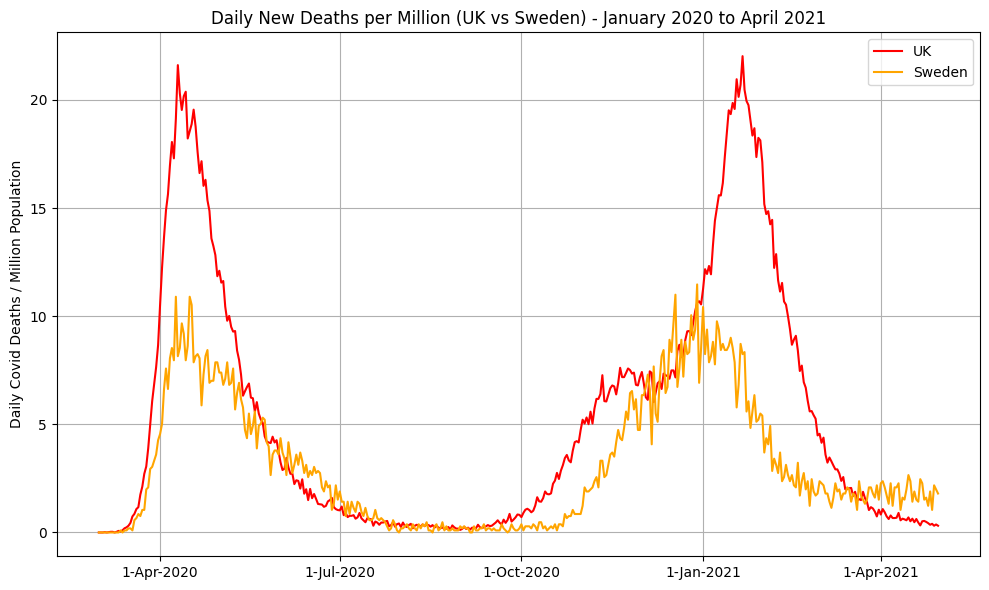

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime

# Assume 'df' is your DataFrame containing the provided columns
df = pd.read_csv('owid-covid-data.csv')
df = pd.DataFrame(df)

# Filter data for the UK and Sweden
uk_sweden_data = df[df['location'].isin(['United Kingdom', 'Sweden'])]

# Filter data for the specified date range (January 2020 to April 2021)
uk_sweden_data['date'] = pd.to_datetime(uk_sweden_data['date'])
uk_sweden_data = uk_sweden_data[(uk_sweden_data['date'] >= '2020-03-01') & (uk_sweden_data['date'] <= '2021-04-30')]

# Pivot data for 'new_deaths_per_million' by location and date
pivot_data = uk_sweden_data.pivot(index='date', columns='location', values='new_deaths_per_million')

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(pivot_data.index, pivot_data['United Kingdom'], color='red', linestyle='-', label='UK')
plt.plot(pivot_data.index, pivot_data['Sweden'], color='orange', linestyle='-', label='Sweden')
plt.title('Daily New Deaths per Million (UK vs Sweden) - January 2020 to April 2021')
plt.ylabel('Daily Covid Deaths / Million Population')
myfmt=mdates.DateFormatter("1-%b-20%y")
plt.gca().xaxis.set_major_formatter(myfmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
